In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import label_binarize


In [2]:
data = fetch_olivetti_faces()
X, y = data.data, data.target


downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [10]:
print("Data Shape:", X.shape)
print("Target Shape:", y.shape)
print("There are {} unique persons in the dataset".format(len(np.unique(y))))
print("Size of each image is {}x{}".format(data.images.shape[1], data.images.shape[2]))


Data Shape: (400, 4096)
Target Shape: (400,)
There are 40 unique persons in the dataset
Size of each image is 64x64


In [11]:
def print_faces(images, target, top_n):
    top_n = min(top_n, len(images))
    grid_size = int(np.ceil(np.sqrt(top_n)))
    fig, axes = plt.subplots(grid_size, grid_size, figsize=(15, 15))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.2, wspace=0.2)
    for i, ax in enumerate(axes.ravel()):
        if i < top_n:
            ax.imshow(images[i], cmap='bone')
            ax.axis('off')
            ax.text(2, 12, str(target[i]), fontsize=9, color='red')
            ax.text(2, 55, f"face: {i}", fontsize=9, color='blue')
        else:
            ax.axis('off')
    plt.show()


In [12]:
def display_unique_faces(pics):
    fig = plt.figure(figsize=(24, 10))
    columns, rows = 10, 4
    for i in range(1, columns * rows + 1):
        img_index = 10 * i - 1
        if img_index < pics.shape[0]:
            img = pics[img_index, :, :]
            ax = fig.add_subplot(rows, columns, i)
            ax.imshow(img, cmap='gray')
            ax.set_title(f"Person {i}", fontsize=14)
            ax.axis('off')
    plt.suptitle("There are 40 distinct persons in the dataset", fontsize=24)
    plt.show()


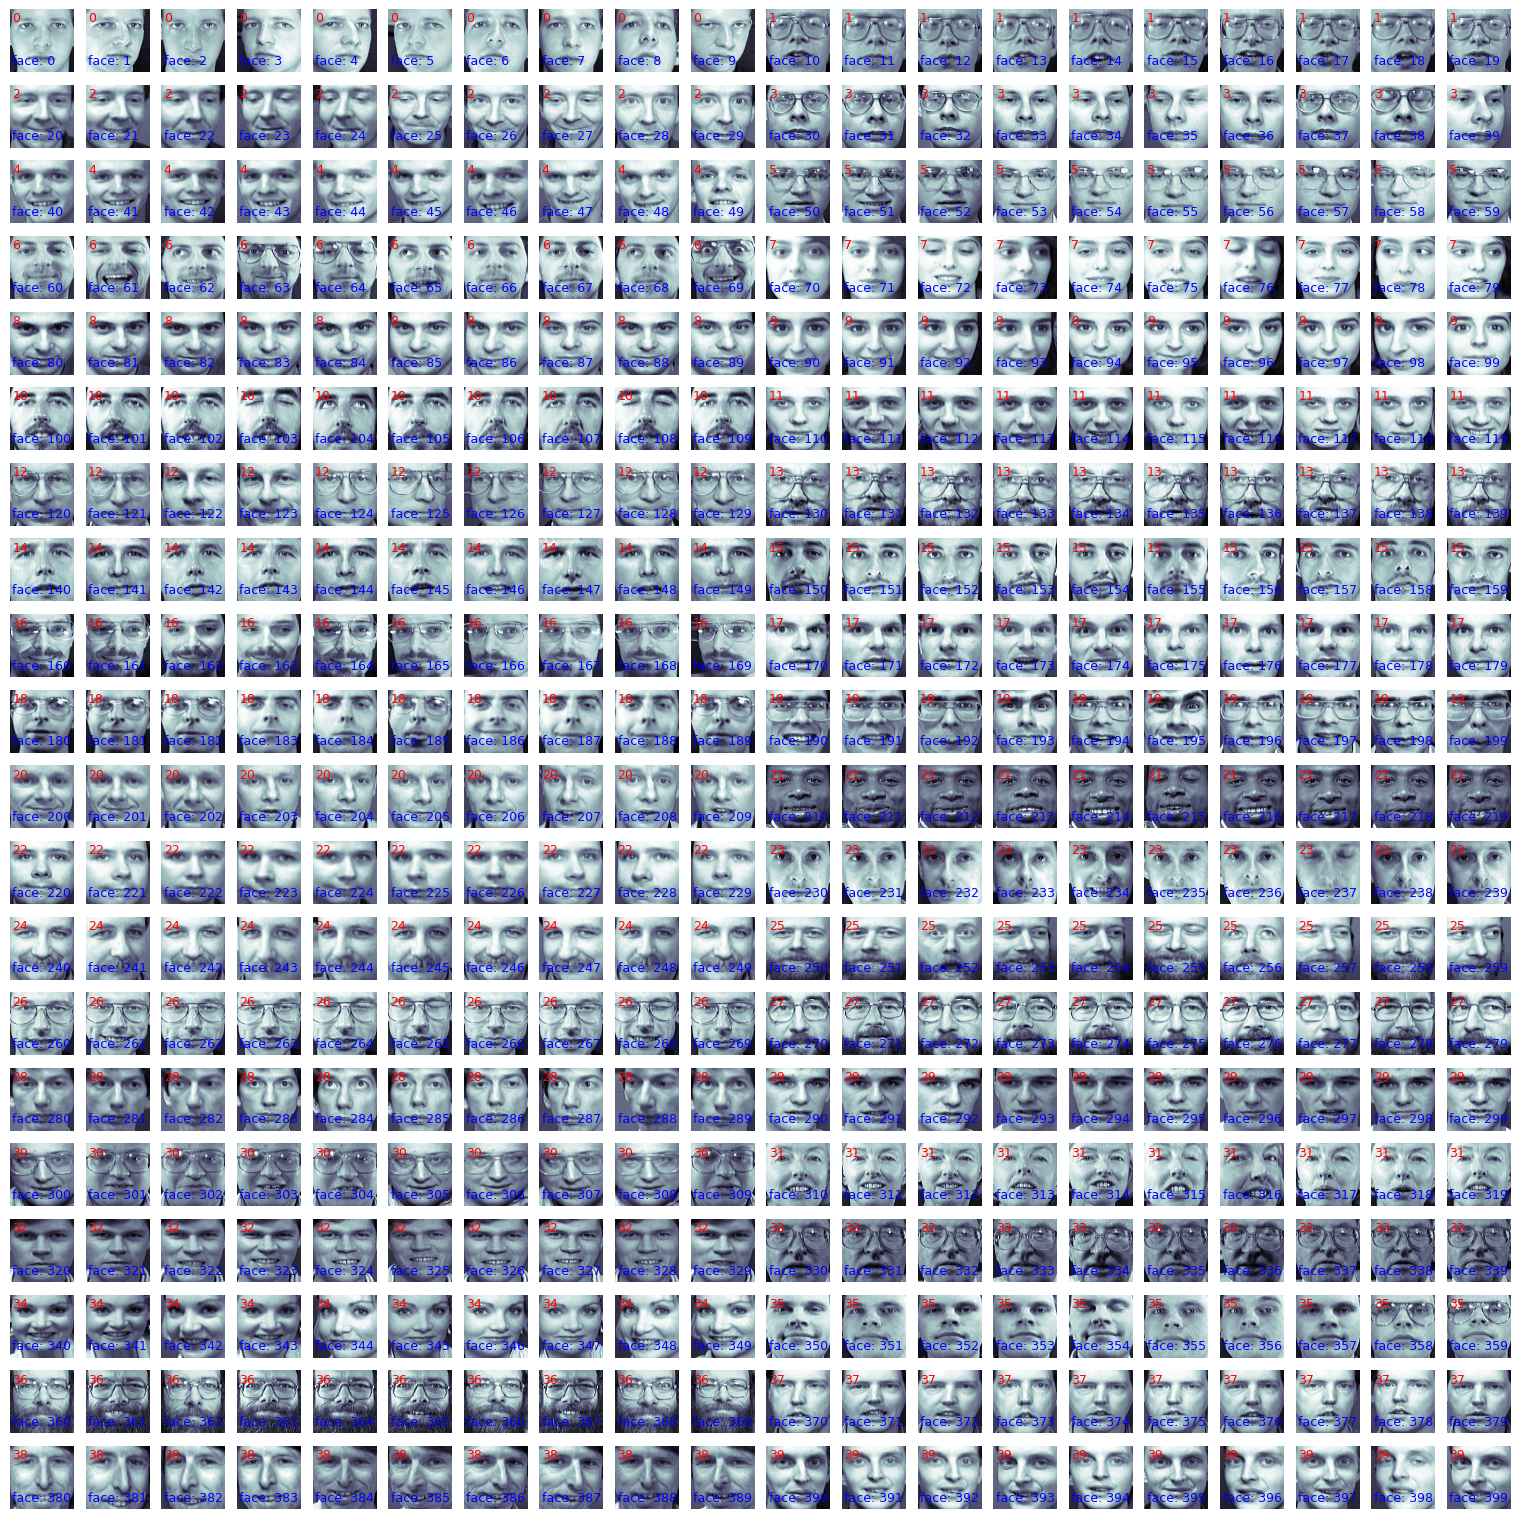

In [13]:
print_faces(data.images, y, 400)

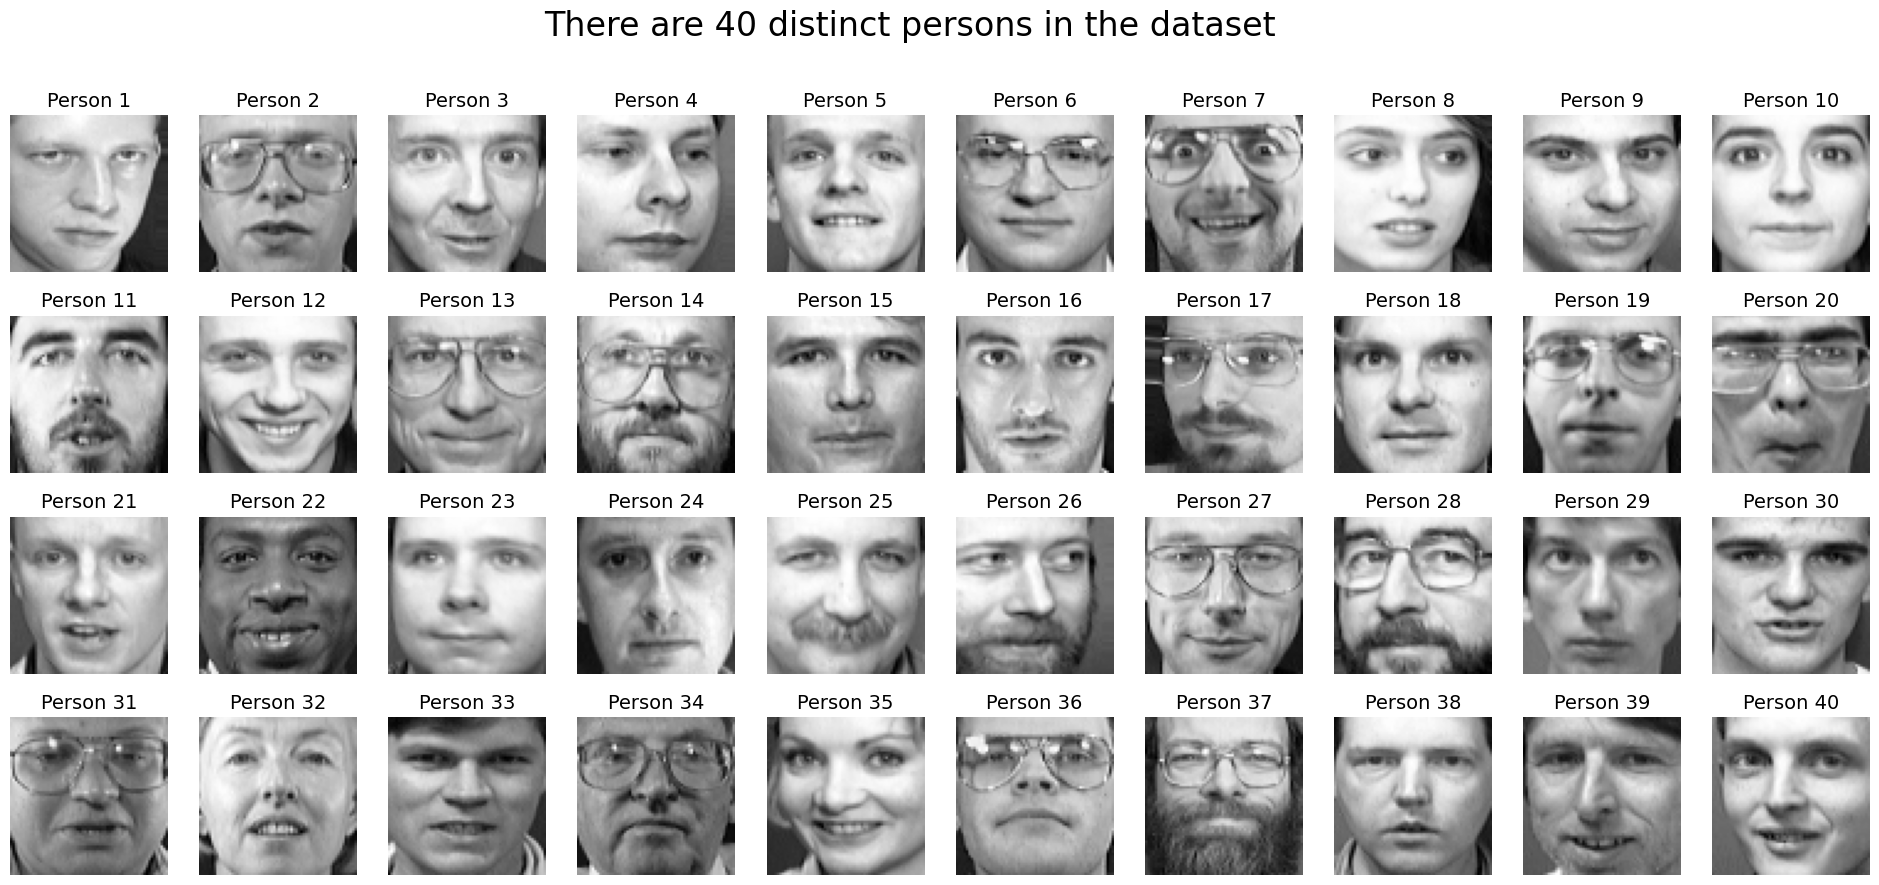

In [14]:
display_unique_faces(data.images)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print("x_train:", X_train.shape)
print("x_test:", X_test.shape)

x_train: (280, 4096)
x_test: (120, 4096)


In [17]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
gnb_acc = round(accuracy_score(y_test, y_pred_gnb) * 100, 2)
print("\n--- Gaussian Naive Bayes ---")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gnb))
print(f"Naive Bayes Accuracy: {gnb_acc}%")



--- Gaussian Naive Bayes ---
Confusion Matrix:
 [[0 0 0 ... 0 0 2]
 [0 4 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 4 ... 0 0 1]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 2]]
Naive Bayes Accuracy: 60.0%


In [18]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)
mnb_acc = round(accuracy_score(y_test, y_pred_mnb) * 100, 2)
print("\n--- Multinomial Naive Bayes ---")
print(f"Multinomial Naive Bayes Accuracy: {mnb_acc}%")



--- Multinomial Naive Bayes ---
Multinomial Naive Bayes Accuracy: 79.17%


In [19]:
misclassified_idx = np.where(y_pred_mnb != y_test)[0]
num_misclassified = len(misclassified_idx)
print(f"Number of misclassified images: {num_misclassified}")
print(f"Total images in test set: {len(y_test)}")
print(f"Accuracy: {round((1 - num_misclassified / len(y_test)) * 100, 2)}%")


Number of misclassified images: 25
Total images in test set: 120
Accuracy: 79.17%


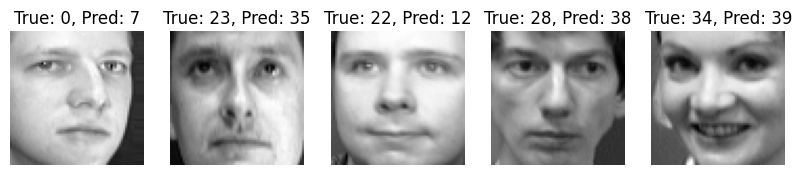

In [20]:
n_to_show = min(5, num_misclassified)
plt.figure(figsize=(10, 5))
for i in range(n_to_show):
    idx = misclassified_idx[i]
    plt.subplot(1, n_to_show, i + 1)
    plt.imshow(X_test[idx].reshape(64, 64), cmap='gray')
    plt.title(f"True: {y_test[idx]}, Pred: {y_pred_mnb[idx]}")
    plt.axis('off')
plt.show()


In [21]:
print("\n--- AUC Scores per Class ---")
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_pred_prob = mnb.predict_proba(X_test)
for i in range(y_test_bin.shape[1]):
    try:
        auc = roc_auc_score(y_test_bin[:, i], y_pred_prob[:, i])
        print(f"Class {i} AUC: {auc:.2f}")
    except ValueError:
        print(f"Class {i} AUC: Not computable (only one class in y_test_bin[:, {i}])")


--- AUC Scores per Class ---
Class 0 AUC: 0.75
Class 1 AUC: 1.00
Class 2 AUC: 1.00
Class 3 AUC: 0.97
Class 4 AUC: 1.00
Class 5 AUC: 0.57
Class 6 AUC: 0.11
Class 7 AUC: 0.15
Class 8 AUC: 0.49
Class 9 AUC: 0.16
Class 10 AUC: 0.15
Class 11 AUC: 0.54
Class 12 AUC: 0.45
Class 13 AUC: 0.11
Class 14 AUC: 0.75
Class 15 AUC: 0.45
Class 16 AUC: 0.40
Class 17 AUC: 0.22
Class 18 AUC: 0.58
Class 19 AUC: 0.97
Class 20 AUC: 0.49
Class 21 AUC: 0.61
Class 22 AUC: 0.23
Class 23 AUC: 0.51
Class 24 AUC: 0.17
Class 25 AUC: 0.44
Class 26 AUC: 0.82
Class 27 AUC: 0.66
Class 28 AUC: 0.48
Class 29 AUC: 0.61
Class 30 AUC: 0.86
Class 31 AUC: 0.46
Class 32 AUC: 0.86
Class 33 AUC: 0.41
Class 34 AUC: 0.30
Class 35 AUC: 0.29
Class 36 AUC: 0.71
Class 37 AUC: 0.63
